In [ ]:
from keras.models import load_model

classifier = load_model('/content/drive/My Drive/satellite_image_analysis/Detect_Object_vgg.h5')

Class - Forest


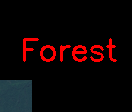

Class - Residential Homes


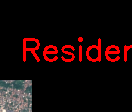

Class - Residential Homes


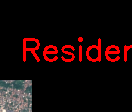

Class - Annual Crop


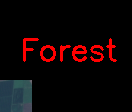

Class - Annual Crop


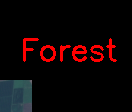

Class - Residential Homes


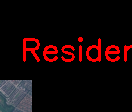

Class - Annual Crop


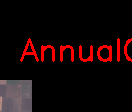

Class - Industry


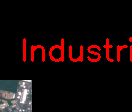

Class - Annual Crop


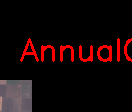

Class - Forest


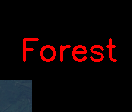

In [ ]:
import os
import cv2
import numpy as np
from os import listdir
from os.path import isfile, join
from google.colab.patches import cv2_imshow

Features_Detected = {"[0]":"AnnualCrop",
                     "[1]":"Forest",
                     "[2]":"Industrial",
                     "[3]":"Residential"}
Features_Detected_n = {"AnnualCrop":"Annual Crop",
                       "Forest":"Forest",
                       "Industrial":"Industry",
                       "Residential":"Residential Homes"}
def draw_test(name, pred, im):
    Object_detect = Features_Detected[str(pred)]
    BLACK = [0,0,0]
    expanded_image = cv2.copyMakeBorder(im, 80, 0, 0, 100 ,cv2.BORDER_CONSTANT,value=BLACK)
    cv2.putText(expanded_image, Object_detect, (20, 60) , cv2.FONT_HERSHEY_SIMPLEX,1, (0,0,255), 2)
    cv2_imshow(expanded_image)

def getRandomImage(path):
    folders = list(filter(lambda x: os.path.isdir(os.path.join(path, x)), os.listdir(path)))
    random_directory = np.random.randint(0,len(folders))
    path_class = folders[random_directory]
    print("Class - " + Features_Detected_n[str(path_class)])
    file_path = path + path_class
    file_names = [f for f in listdir(file_path) if isfile(join(file_path, f))]
    random_file_index = np.random.randint(0,len(file_names))
    image_name = file_names[random_file_index]
    return cv2.imread(file_path+"/"+image_name)    

for i in range(0,10):
    input_im = getRandomImage("/content/drive/My Drive/satellite_image_analysis/Test/")
    input_original = input_im.copy()
    input_original = cv2.resize(input_original, None, fx=0.5, fy=0.5, interpolation = cv2.INTER_LINEAR)
    
    input_im = cv2.resize(input_im, (64, 64), interpolation = cv2.INTER_LINEAR)
    input_im = input_im / 255.
    input_im = input_im.reshape(1,64,64,3) 
    
    res = np.argmax(classifier.predict(input_im, 1, verbose = 0), axis=1)
    
    draw_test("Prediction", res, input_original)